In [266]:
import yaml

with open('../config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

# Numpy

* Пакет для Python, реализующий многомерные массивы
* Массивы **статически типизированные**. Тип элементов определяется при создании массива.
* Массивы эффективно используют память.
* Методы линейной алгебры в numpy реализованы на C и Fortran, что обеспечивает хорошую производительность.
* Пакет numpy активно используется в научных проектах по всему миру.

In [202]:
import numpy as np

## Создание массивов

Существует несколько способов создания новых numpy массивов:
* через списки и кортежи Python
* используя специальные функции numpy такие, как `arange`, `linspace`, и так далее.
* вычитывая данные из файлов

### 1D массивы:

In [ ]:
a = np.array([0,1,2,3])
a

In [ ]:
type(a), a.dtype

In [ ]:
a.ndim, a.shape, len(a)

In [ ]:
b = np.array((3, 4, 5))
b

В numpy существует множество функций для генерации массивов:

<p style="font-size:16px"><b>`arange`</p></b>

Генерирует значения в интервале [start, stop) с шагом step. Аналог встроенной функции Python `range`. На уровне типов они, конечно, отличаются. `np.arange` возвращает обычный numpy-массив, в то время как `range` является lazy sequence/lazy iterable и стоит в общем ряду с `list` и `tuple`. Funny fact: `range` не является итератором -- он не "иссякает", для него нельзя вызвать `next()` и можно `len()`, но, в отличие от списка, он lazy

In [ ]:
x = np.arange(0, 10, 1) # аргументы: start, stop, step
type(range(10))

In [ ]:
x = np.arange(-1, 1, 0.1)
x

<p style="font-size:16px"><b>`linspace` и `logspace`</b></p>

`linspace` Генерирует равномерно распределенные числа, включая конечные точки.

`logspace` То же, но в логарифмической шкале.

In [ ]:
np.linspace(0, 10, 10) # аргументы: start, stop, число точек

In [ ]:
np.logspace(0.1, 1, 4, base=2)

<p style="font-size:16px"><b>`zeros`, `ones`, `zeros_like` и `ones_like`</b></p>

In [ ]:
np.zeros((5,))   # Аргумент должен быть кортежем

In [ ]:
a = np.ones((4,))
a

In [ ]:
b = np.zeros_like(a)
b

In [ ]:
c = np.ones_like(b)
c

Задание 1. Создайте вектор со значениями от 0 до 65

In [204]:
a = np.arange(66)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

### Многомерные массивы

In [ ]:
# Матрица
m = np.array([[1., 2.], [3., 4.]])
m

In [ ]:
type(m), m.dtype

In [ ]:
m.ndim, np.shape(m), len(m), np.size(m)

При попытке назначить значение другого типа будет выдана ошибка:

In [ ]:
m[0,0] = 'hello' 

<p style="font-size:16px"><b>`zeros`, `ones`, `zeros_like` и `ones_like`</b></p>

In [ ]:
a = np.ones((3, 3))
a

In [ ]:
b = np.zeros((2, 2))
b

<p style="font-size:16px"><b>Другие функции</b></p>

In [ ]:
c = np.eye(3) # единичная матрица
c

In [ ]:
d = np.diag(np.arange(4)) # диагональная матрица
d

**Задание**: Создайте матрицу 3х3 со значениями от 0 до 9

In [205]:
a = np.arange(9).reshape((3,3))
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
np.arange(9).reshape((3,3))

**Задание**: создайте матрицу 9 на 9, заполните случайными значениями и найдите максимальный, минимальный элемент и среднее значение.

In [206]:
d = np.random.rand(9, 9)
max_el = np.max(d)
min_el = np.min(d)
avg_el = np.average(d)
max_el, min_el, avg_el

(0.9808656054840083, 0.019530803056741153, 0.4755994681535359)

## Копирование в NumPy

Как мы помним, в Python при присваивании не происходит копирование объектов. 

In [ ]:
m = np.array([[1, 2], [3, 4]])
m

In [ ]:
n = m

In [ ]:
# Изменение N меняет M
n[0, 0] = 10
n

In [ ]:
m

Глубокая копия создается в NumPy с помощью функции `copy`:

In [ ]:
n = np.copy(m)

In [ ]:
# теперь при изменении N M остается нетронутым
n[0,0] = -5
n

In [ ]:
m

Какой бы shape ни имел массив, в памяти он хранится как обыкновенный линейный массив. В примере показан C-order хранения многомерного массива ("укладываем" массив по строкам 
 последний индекс является самым быстрым). Такие массивы называют C-contiguous. Альтернативой является Fortran-order, где массив "укладывается" по столбцам 
 первый индекс является самым быстрым. Такие массивы называют Fortran-contiguous. Узнать, является ли массив C-contiguous или Fortran-contiguous, мы можем с помощью атрибута flags. В общем случае numpy используется C-order:

In [ ]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
a.flags

In [ ]:
a = np.array([
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9],
])
a.flags

Линейный массив (он же иногда называется буфером), в котором хранятся данные, хранится в атрибуте data. Более конкретно, в нем хранится указатель на первый элемент массива, поэтому работать с ним напрямую мы не можем:

In [ ]:
a.data

Атрибут strides задает шаги в байтах, необходимые для перехода к следующему элементу вдоль того или иного индекса. Например, для двумерного массива типа int16 с shape = (4, 3) и C-contiguous буфером мы получим stride = (3x2, 1x2)

Numpy старается минимизировать количество копирований массивов, в результате чего многие операции, например slicing и в большинстве случаев reshape, возвращают view (представление) массива, а не его копию. Это становится возможным благодаря модификации shape, strides и указателя на первый элемент массива (то есть data). Помня об этом, всегда можно догадаться, произойдет копирование или будет использоваться view: всегда, когда можно построить массив из исходного путем модификации shape, stride и/или сдвига указателя в data, будет использоваться view. Рассмотрим несколько примеров

In [ ]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
], dtype=np.int16)
a.strides

Воспользуемся slicing для взятия каждого второго столбца. Это эквивалентно удвоению stride по второму индексу. Следовательно, будет использоваться view без копирования массива

In [ ]:
b = a[:, ::2]
b.strides

Проверить, является ли массив view, можно, обратившись к атрибуту base: он равен None для скопированных или вновь созданных массивов и равен исходному массиву для view

In [ ]:
b.base

In [ ]:
b.copy().base is None

Аналогично можно убедиться, что slicing для взятие каждой второй строки, начиная со второй, так же даст view без какого-либо копирования. В данном случае происходит удвоение stride по первому индексу и сдвиг указателя вперед на один элемент

In [ ]:
b = a[1::2, :]
b.strides

In [ ]:
b.base

Из этих примеров становится ясно, что все операции slicing-а приводят к появлению view. Более сложная индексация, которую мы рассмотрим ниже, уже приведет к копированию


При изменении представления меняется и изначальный массив:

In [ ]:
a = np.arange(10)
a

In [ ]:
b = a[::2]
b

In [ ]:
b[0] = 12
b

In [ ]:
a # (!!)

In [ ]:
a = np.arange(10)
b = a[::2].copy() # глубокое копирование
b[0] = 12
a

## Слияние массивов

Функции `vstack`, `hstack` и `concatenate` позволяются составить общий массив из нескольких массивов:

<p style="font-size:22px"><b>`concatenate`</b></p>

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

In [ ]:
b = np.array([[5, 6]])
b

In [ ]:
np.concatenate((a, b), axis=0)

In [ ]:
np.concatenate((a, b.T), axis=1)

<p style="font-size:22px"><b>`hstack` и `vstack`</b></p>

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a,b.T))

## Индексация

Доступ к данным массива организуется с помощью индексов и оператора `[]`.

In [ ]:
a = np.arange(10)
a

In [ ]:
a[0], a[2], a[-1]

Для многомерных массивов индексами является кортеж целых чисел:

In [ ]:
m = np.diag(np.arange(3))
m

In [ ]:
m[1, 1]

In [ ]:
m[(1, 1)]

Можно использовать "`:`" для получения доступа к целой колонке или строке: 

In [ ]:
m[1, :] # строка 1

In [ ]:
m[:, 2] # колонка 2

Присваивание новых значений элементам массива:

In [ ]:
m[2, 1] = 10
m

In [ ]:
m[1, :] = 5
m[: ,2] = -1

In [ ]:
m

## Слайсинг

NumPy поддерживает слайсинг, как и списки с кортежами в Python:

In [ ]:
a = np.arange(10)
a

Все три параметра слайсинга являются опциональными: по умолчанию `start` равен **0**, `end` равен последнему элемену и `step` равен **1** в `a[start:stop:step]`:

In [ ]:
a[::] # все параметры слайсинга имеют значения по умолчанию

In [ ]:
a[1:3]

In [ ]:
a[:3]

In [ ]:
a[3:]

In [ ]:
a[2:9:2] 

Отрицательные индексы отсчитываются от конца массива:

In [ ]:
a[-1] # последний элемент массива

In [ ]:
a[-3:] # последние три элемента

Слайсы являются представлениями массива, а потому являются изменяемыми:

In [ ]:
a[1:3] = [-2,-3]
a

**Задание**: разверните массив (1, 2, 3) -> (3, 2, 1)

In [ ]:
a = np.arange(1, 4)[::-1]
a

Слайсинг работает точно так же и для многомерных массивов:

In [ ]:
m = np.random.randint(1,100, size=(4, 4))
m

In [ ]:
m[1:4, 1:4]

In [ ]:
m[::2, ::2]

**Задание**: Создайте массив 5х5 и заполните двойками обе диагонали, а нулями все остальное

In [209]:
array = np.zeros((5, 5), dtype=int)

np.fill_diagonal(array, 2)

for i in range(array.shape[0]):
    array[i, array.shape[1] - 1 - i] = 2
array

array([[2, 0, 0, 0, 2],
       [0, 2, 0, 2, 0],
       [0, 0, 2, 0, 0],
       [0, 2, 0, 2, 0],
       [2, 0, 0, 0, 2]])

**Задание**: Создайте массив с значениями 1,2,3,4 на 1 поддиагонали 

In [210]:
array = np.zeros((5, 5), dtype=int)
array[1:, :-1] = np.diag([1, 2, 3, 4])
array

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

## Линейная алгебра

Код, написанный на numpy становится эффективным тогда, когда он достаточно векторизован (т.е. векторные и матричные операции используются в бОльшей части программы).

### Поэлементные операции

Все арифметические операции по умолчанию являются поэлементными:

In [ ]:
a = np.arange(4)
a + 1

In [ ]:
5*a

In [ ]:
2**a

In [ ]:
j = np.arange(5)
2**(j + 1) - j

### Операции между массивами

In [ ]:
a = np.arange(4)
b = np.ones(4) + 3
print('a = ', a)
print('b = ', b)
a - b

In [ ]:
a * b

Сравнения:

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

In [ ]:
a > b

Логические операции:

In [ ]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

In [ ]:
a | b

In [ ]:
np.logical_and(a, b)

In [ ]:
a & b

Использование логических операторов позволяет обращаться к элементам массива через маску:

In [ ]:
c = np.array([1, 2, 3, 4], dtype=int)
d = np.array([1, 2, 5, 6], dtype=int)
c[c == d]

**Задание**: найдите ненулевые элементы массива [1,2,0,0,8,0, 4,1]

In [216]:
array = np.array([1, 2, 0, 0, 8, 0, 4, 1])
array[array != 0]

array([1, 2, 8, 4, 1])

### Матричная алгебра

Перемножение массивов является поэлементным. Для матричного умножения необходимо использовать функцию `dot`:

In [ ]:
m = np.array([[1., 2.], [3., 4.]])
m

In [ ]:
m * m

In [ ]:
m.dot(m)

**Задание**: Создайте 2 массива 2х4, проверьте, что они одинаковы

In [218]:
a = np.random.rand(2, 4)
b = np.random.rand(2, 4)
a==b

array([[False, False, False, False],
       [False, False, False, False]])

### Трансформирование массивов

Для транспонирования матриц используется либо `.T`, либо функция `transpose`:

In [ ]:
m

In [ ]:
m.T

In [ ]:
m.transpose()

Метод reshape позволяет изменить shape массива на произвольный shape, дающий то же число элементов, что и оригинальный shape. 

Понять, каким будет конечный вид массива, легко. Достаточно представить, как текущий массив выглядит в линейной форме в соответствии с C-order или F-order в зависимости от аргумента order, передаваемого в reshape (по умолчанию используется C-order), и переписать его в многомерный вид в соответствии с новым shape, используя тот же order. Рассмотрим пример ниже

In [ ]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
], dtype=np.int16)
a.shape

In [ ]:
a.reshape(-1)


Допустим теперь, что мы хотим получить shape = (2, 2, 3). В C-order самым быстрым индексом является последний, следовательно, фиксируя первые два индекса, мы должны получить подмассивы a_1 = [0, 1, 2], a_2 = [3, 4, 5], a_3 = [6, 7, 8] и a_4 = [9, 10, 11]. Их "схлопывание" дает снова линейный массив [a_1, a_2, a_3, a_4]. Снова используя C-order и фиксируя первый индекс, мы получаем два подмассива [a_1, a_2] и [a_3, a_4]. Следовательно, финальный массив будет иметь следующий вид:

[
    [
        [0, 1, 2],
        [3, 4, 5],
    ],
    [
        [6, 7, 8],
        [9, 10, 11],
    ],
]

In [ ]:
a.reshape(2, 2, 3)

**Задание**: Создайте вектор х длины 5 и матрицу А размера 5х4. Перемножьте их, чтобы получить результаты размера [1,5], [5], [4x5] 

In [221]:
x = np.arange(1, 6)
A = np.arange(1, 21).reshape(5, 4)


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [222]:
res_1_5= x@A
res_1_5

array([175, 190, 205, 220])

In [227]:
x_col = x.reshape(5, 1)
A_T = A.T
res_5 = A_T@x_col
res_5

array([[175],
       [190],
       [205],
       [220]])

Другие математические функции:

In [228]:
c = np.matrix([[1j, 2j], [3j, 4j]])
c

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [ ]:
np.conjugate(c)

Эрмитово-сопряженная матрица(transpose + conjugate):

In [229]:
c.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

Вещественная и мнимая части могут быть получены с помощью `real` и `imag`:

In [ ]:
np.real(c) # то же: c.real

In [ ]:
np.imag(c) # то же: c.imag

Модули элементов матрицы:

In [ ]:
np.abs(c)

Задание: Извлеките целые части из случайного массива размера 5х5 (с float типом) как минимум 3 разными способами

In [230]:
array = np.random.rand(5, 5)
array

array([[3.44540706e-01, 7.06125387e-01, 3.19598561e-01, 2.00317029e-01,
        5.29887966e-01],
       [6.00550729e-01, 3.76600894e-01, 2.81730511e-01, 6.81717034e-02,
        7.28135528e-01],
       [3.09269900e-01, 7.33388661e-01, 8.00988480e-01, 9.99400722e-01,
        3.59569769e-01],
       [8.88760175e-01, 7.98855351e-01, 5.63515077e-02, 5.57419696e-01,
        7.65464178e-01],
       [8.49536668e-01, 9.54872716e-01, 9.99340416e-04, 9.00900204e-01,
        6.77069896e-01]])

In [231]:
integer_parts_floor = np.floor(array)
integer_parts_floor

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [232]:
integer_parts_trunc = np.trunc(array)
integer_parts_trunc

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [233]:
integer_parts_astype = array.astype(int)
integer_parts_astype

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

Задание: создайте двумерный массив, а потом добавьте к нему границу толщины 2 (весь исходный массив должен быть в новом)

In [234]:
original_array = np.arange(1, 10).reshape(3, 3)
padded_array = np.pad(original_array, pad_width=2, mode='constant', constant_values=0)
padded_array

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 7, 8, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

Задание: создайте массив 8х8, заполните 0 и 999 в шахматном порядке. 

In [235]:
chessboard = np.zeros((8, 8), dtype=int)
chessboard[::2, ::2] = 999  
chessboard[1::2, 1::2] = 999 
chessboard

array([[999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999],
       [999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999],
       [999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999],
       [999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999]])

Задание: создайте массив 8х8, заполните 0 и 999 в шахматном порядке. Используйте функцию tile

In [237]:
a = np.array([
    [999, 0],
    [0, 999]
])
chessboard = np.tile(a, (4, 4))
chessboard

array([[999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999],
       [999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999],
       [999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999],
       [999,   0, 999,   0, 999,   0, 999,   0],
       [  0, 999,   0, 999,   0, 999,   0, 999]])

### Матричные вычисления

<p style="font-size:18px"><b>inverse</b></p>

In [ ]:
np.linalg.inv(c) # то же: C.I 

In [238]:
c.I * c

matrix([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
        [1.11022302e-16+0.j, 1.00000000e+00+0.j]])

<p style="font-size:18px"><b>determinant</b></p>

In [ ]:
np.linalg.det(c)

In [ ]:
np.linalg.det(c.I)

Задание: нормализуйте случайный массив

In [239]:
array = np.random.rand(5, 5) * 10
normalized_array = (array - np.min(array)) / (np.max(array) - np.min(array))
normalized_array

array([[0.01368479, 0.54601232, 0.3553324 , 0.36974313, 0.02020844],
       [0.80622467, 1.        , 0.41773342, 0.92254688, 0.74066752],
       [0.62651283, 0.        , 0.4052872 , 0.82937307, 0.21750848],
       [0.5874562 , 0.95176906, 0.4774042 , 0.26420151, 0.98689897],
       [0.97231948, 0.93660116, 0.90726833, 0.60573476, 0.32037184]])

Задание: Создайте квадратные матрицы A, B. Посчитайте ((A+B)*(-A/2)) без копирования массивов.

In [243]:
A = np.arange(10, 19, dtype=float).reshape(3, 3)

B = np.arange(1, 10, dtype=float).reshape(3, 3)

result = np.add(A, B, out=A)  
result = np.divide(A, -2, out=A)  
result = np.multiply(A, B, out=A)
result

array([[  -5.5,  -13. ,  -22.5],
       [ -34. ,  -47.5,  -63. ],
       [ -80.5, -100. , -121.5]])

## Векторизация функций

Numpy предлагает средства для создания векторизованных оберток над функциями, которые изначально принимают на вход скалярные значения.

In [244]:
def foo(x):
    if x >= 0:
        return 1
    else:
        return 0

In [ ]:
foo(np.array([-3, -2, -1, 0, 1, 2, 3]))

Эта функция работает для скалярных данных. 

Чтобы это функция принимала векторные значения, необходимо провести векторизацию с помощью функии `vectorize`:

In [ ]:
foo_vec = np.vectorize(foo)

In [ ]:
foo_vec(np.array([-3, -2, -1, 0, 1, 2, 3]))

- Задание: создайте случайный вектор размера 10 и отсортируйте
- Доп.задание: отсортируйте строки двумерной матрицы 6х6

In [245]:
vector = np.random.rand(10)
sorted_vector = np.sort(vector)
sorted_vector

array([0.09483346, 0.13653073, 0.15859144, 0.17715777, 0.20927399,
       0.66312712, 0.718693  , 0.82142639, 0.92061026, 0.99468004])

In [ ]:
matrix = np.random.rand(6, 6)
sorted_matrix = np.sort(matrix, axis=1)
sorted_matrix

Задание: Вычтите среднее из строк матрицы.

In [247]:
matrix = np.arange(1, 17).reshape(4, 4)
row_means = np.mean(matrix, axis=1, keepdims=True)
matrix_1 = matrix - row_means
matrix_1

array([[-1.5, -0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5,  1.5]])

Задание: Создайте массив [[1, 0, null, 2, 4, null, 9],[null, 1, 0, -2, null, null, 3]]. Выведите маску, в которой 1 соответствуют null значениям.

In [248]:
array = np.array([
    [1, 0, np.nan, 2, 4, np.nan, 9],
    [np.nan, 1, 0, -2, np.nan, np.nan, 3]
])
mask = np.isnan(array).astype(int)
mask

array([[0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0]])

# Matplotlib

* Пакет для Python, используемый для создания качественных 2D визуализацией (есть минимальная поддержка 3D)
* Возможность создавать интерактивные графики
* Добавление множества графиков на один рисунок с кастомным расположением
* Экспорт в различные форматы изображений
* Есть поддержка анимаций

In [249]:
# Позволяет matplotlib отображать графики сразу в notebook.
%matplotlib inline

## Matplotlib API

Импортирование модуля `matplotlib.pyplot` под именем `plt`:

In [250]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

Простейший пример построения графиков в matplotlib:

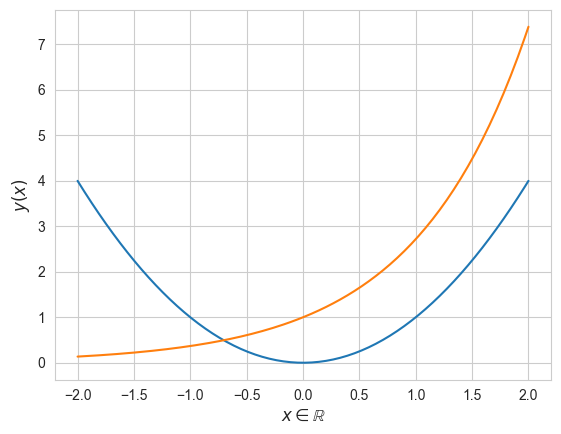

In [251]:
x = np.linspace(-2., 2., 128, endpoint=True)
y1 = x**2
y2 = np.exp(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel(r'$x \in \mathbb{R}$', fontsize=12)
plt.ylabel(r'$y(x)$', fontsize=12)
plt.show()

Рекомендуется создавать отдельный объект для каждого более-менее сложного графика. Это можно реализоваться, например, с помощью функии `subplots`:

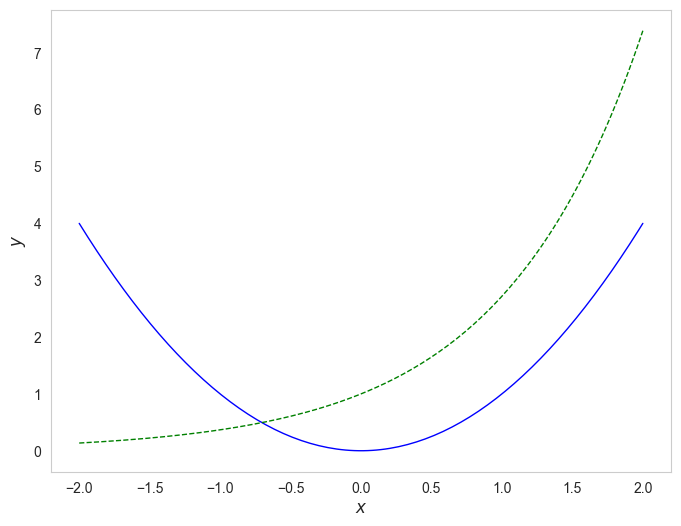

In [252]:
# Сетка графиков -- 1x1. Размер задается с помощью figsize.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(x, y1, color="blue", linewidth=1.0, linestyle="-")
ax.plot(x, y2, color="green", linewidth=1.0, linestyle="--")
ax.grid()
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
plt.show()

Множественные графики

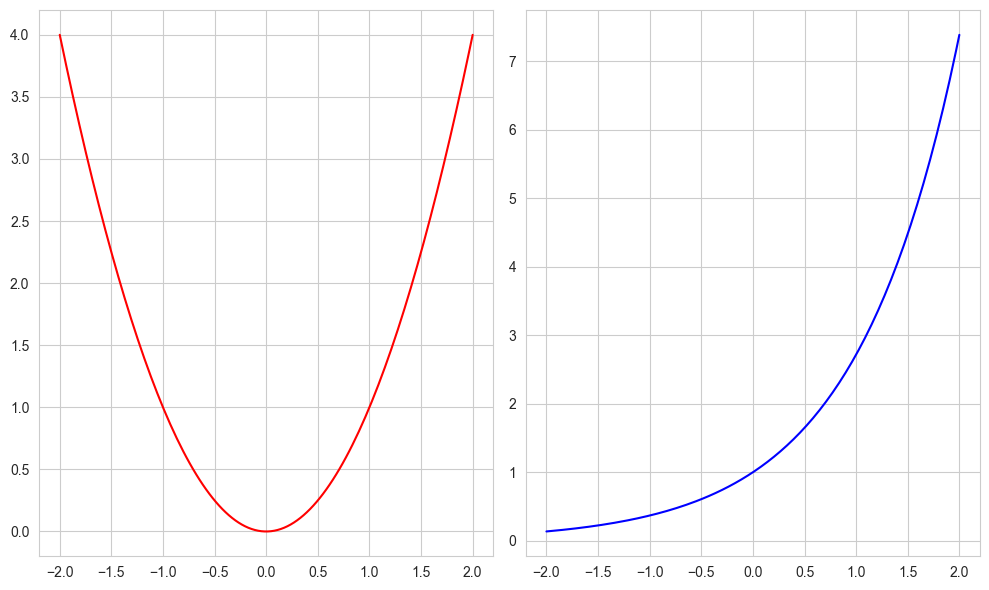

In [253]:
# Создаем 2 графика (в 2 колонках)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(x, y1, 'r')
axes[1].plot(x, y2, 'b')
fig.tight_layout()

## Сохранение графиков

Текущий график можно сохранить, вызвав метод `savefig` класса `Figure`:

In [254]:
fig.savefig("filename.png")

Также можно указать DPI и различные форматы:

In [255]:
fig.savefig("filename.pdf", dpi=200)

### Легенды, описания осей и графиков

**Заголовок графика**


`axes.set_title("title")`

**Описания осей**


`axes.set_xlabel("x")
axes.set_ylabel("y")`

**Легенда**

Легенды могут создаваться двумя способами. Первый -- явно через метод `legend`:

`axes.legend(["curve1", "curve2"])`

Второй метод -- использование `label="label text"` при вызове `plot` с последующим вызовом метода `legend`: 

`axes.plot(x, x**2, label="curve1")
axes.plot(x, x**3, label="curve2")
axes.legend()`

Также можно выбрать расположение легенды на графике:

`ax.legend(loc=0) # автовыбор
ax.legend(loc='upper right')
ax.legend(loc='upper left')
ax.legend(loc='lower left')
ax.legend(loc='lower right')`

Пример использования описанного выше:

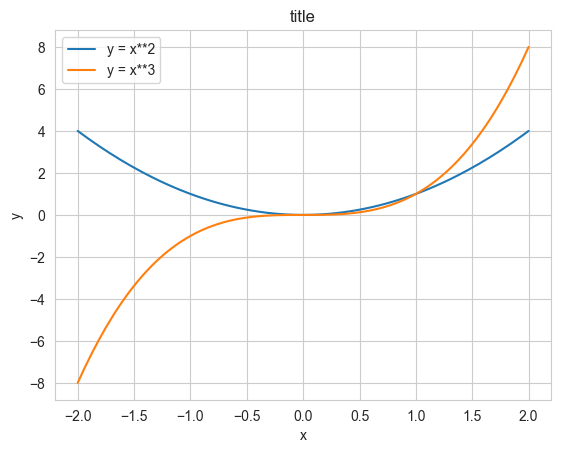

In [256]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc='upper left');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

**Задание**:
Дан временной ряд дневной цены некоторого актива:

stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])
1) Постройте временной ряд недельного скользящего среднего, то есть скользящего среднего с окном, равным одной неделе. При построении скользящего среднего ряда игнорируйте ту часть исходного временного ряда, где в окно попадает меньше одной недели.
2) Постройте линейный график исходной цены и цены, полученной с помощью скользящего среднего

In [ ]:
stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])
window_size = 5
moving_avg = np.convolve(stock_prices, np.ones(window_size) / window_size, mode='valid')

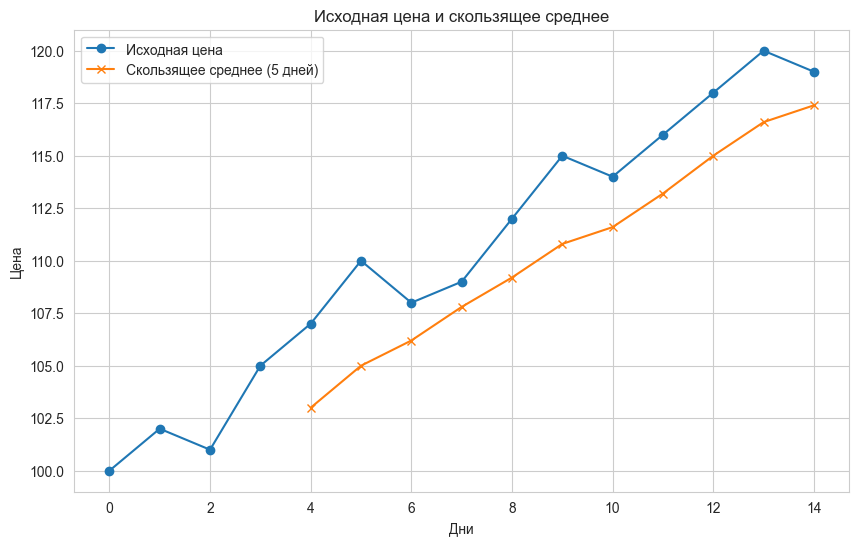

In [257]:
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Исходная цена', marker='o')
plt.plot(range(window_size - 1, len(stock_prices)), moving_avg, label='Скользящее среднее (5 дней)', marker='x')

plt.title('Исходная цена и скользящее среднее')
plt.xlabel('Дни')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

Интерфейс subplots позволяет создавать сетку из множественных графиков

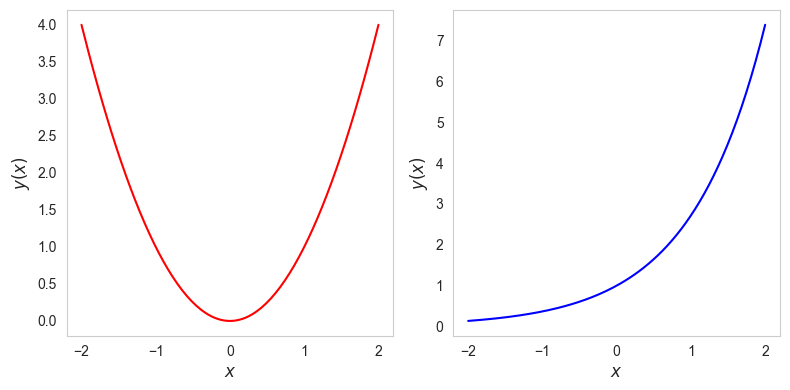

In [258]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(x, y1, "r")  # в этот раз мы используем fmt для задания цвета
axes[1].plot(x, y2, "b")
for ax in axes:
    ax.set_xlabel(r'$x$', fontsize=12)
    ax.set_ylabel(r'$y(x)$', fontsize=12)
    ax.grid()
fig.tight_layout()
plt.show()

**Задание**: создайте график 2х1, постройте графики sin(x), e**(x). Используйте в графике с e**x логарифмическую шкалу (semilogx, semilogy или loglog).

# Pandas

* Пакет для Python, используемый для представления, манипуляций и анализа табличных данных 
* Строится вокруг эффективно реализованных структур `pd.DataFrame` (таблица) и `pd.Series` (колонка), которые позволяют быстро манипулировать большими датасетами (если они помещаются в памяти, в противном случае необходимо использовать `dask`)
* Поддерживает интерфейс, схожий с numpy массивами, но добавляет поддержку кастомовой табличной индексации
* Часто используется как структура датасета для ML моделей

In [ ]:
import pandas as pd

## Создание рядов и датафреймов

Основные манипуляции данными в pandas происходят через `pd.Series` (одномерный массив с кастомной индексацией) и `pd.DataFrame` (двумерный массив с кастомной индексацией и интерпретацией строк и столбцов). В рамках одного столбца (или одного `pd.Series`) тип данных постоянен.

### Создание `pd.Series`

Мы можем создать `pd.Series` напрямую из массива/списка. В этом случае будет создан автоматический индекс от 0 до N - 1, к которому мы всегда можем получить доступ через аттрибут `index`. Сам индекс является отдельным типом, который наследуется от `pd.Index` и представляет immutable последовательность, пригодную для индексации.

In [259]:
a = [1, 3, 5]
s = pd.Series(a)
s

0    1
1    3
2    5
dtype: int64

In [260]:
s.index

RangeIndex(start=0, stop=3, step=1)

Мы также можем задать свой собственный индекс, если он у нас имеется. Для удобства можно представлять себе индекс как первичный ключ в терминах SQL

In [261]:
s = pd.Series(a, index=['x', 'y', 'z'])
s

x    1
y    3
z    5
dtype: int64

In [262]:
s.index

Index(['x', 'y', 'z'], dtype='object')

Создать `pd.Series` мы можем также из словаря, где ключи будут интерпретироваться как индексы.

In [263]:
data = {
    'x': 1,
    'y': 3,
    'z': 5,
}
s = pd.Series(data)
s

x    1
y    3
z    5
dtype: int64

### Создание `pd.DataFrame`

Мы можем представить `pd.DataFrame` как набор `pd.Series`, скрепленных общим индексом. Существует множество способов, как мы можем создать `pd.DataFrame`, но проще всего это сделать с помощью словаря.

In [264]:
people = {
    'first_name': ['Anastasiya', 'Anton', 'Boris'],
    'second_name': ['Nikolskaya', 'Pershin', 'Yeltsin'],
    'sex': ['f', 'm', 'm'],
    'gpa': [4.8, 4.5, 3.5],
}
df = pd.DataFrame(people)
df

,first_name,second_name,sex,gpa
0,Anastasiya,Nikolskaya,f,4.8
1,Anton,Pershin,m,4.5
2,Boris,Yeltsin,m,3.5


Мы также можем загрузить данные из файла. Чаще всего для этого используют csv и соответствующую функции `pd.read_csv()`

In [267]:
df_csv = pd.read_csv(cfg['house_pricing']['train_dataset'])
df_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Доступ к данным в датафрейме

Используя индекс и название столбца, мы всегда можем получить доступ к любому набору данных в датафрейме. Общий интерфейс нам предоставляет оператор `[ ]`, примененный к `loc`. Первым аргументом здесь будет индекс, а вторым -- столбец:

In [268]:
df.loc[1, 'first_name']

'Anton'

И первый, и второй аргументы могут последовательностями, что позволяет получить доступ к любому подмножеству датафрейма, который сам является датафреймом:

In [269]:
df.loc[[0, 1], ['first_name', 'second_name']]

,first_name,second_name
0,Anastasiya,Nikolskaya
1,Anton,Pershin


Есть несколько упрощений для этого синтаксиса. Начнем с доступа по индексу исключительно. Допустим, мы хотим получить строку с индексом 1:

In [ ]:
df.loc[1]

Обратите внимание, что возвращенный объект является инстансом `pd.Series` с индексом `['first_name', 'second_name', 'sex', 'gpa']`:

In [ ]:
print(type(df.loc[1]))
df.loc[1].index

Мы также можем получить `pd.Series` по одному из столбцов, используя оператор `[ ]` напрямую:

In [ ]:
df['first_name']

Снова можно передать последовательность названий столбцов в `[ ]` для получения подмножества столбцов:

In [ ]:
df[['first_name', 'second_name']]

Мы также можем комбинировать `loc()` и `[ ]` для получения доступа к любому подмножеству датафрейма (chained indexing). Это легитимно до тех пор, пока нашей задачей является доступ к данным, а не их изменение

In [ ]:
df[['first_name', 'second_name']].loc[[0, 1]]

## Изменение данных в датафрейме

Обратите внимание, что во всех операциях выше возвращался новый инстанс `pd.DataFrame` или `pd.Series`. Возникает естественный вопрос -- происходит в этом случае копирование данных или нет? На этот вопрос нет однозначного ответа -- в одном случае может произойти копирование данных, а в другом будет возвращено их представление. Существуют правила, которые конкретизируют эти случаи [1], но во всех операциях следует использовать наиболее консервативный подход, то есть явные копирования и изменения. Ниже мы рассмотрим частные случаи.

Правило для изменения данных в исходном датафрейме очень простое -- не должно быть никакого chained indexing [2]. В противном случае мы можете получить warning `SettingWithCopy`. Причина состоит в том, что pandas не имеет механизма для отслеживания "представлений в представлениях". После первой индексации будет возвращен датафрейм/ряд, относительно которого нет уверенности -- является ли он копией или представлением.

[1] https://stackoverflow.com/questions/23296282/what-rules-does-pandas-use-to-generate-a-view-vs-a-copy  
[2] https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Предположим, что мы хотим изменить оценку в исходном датафрейме для индекса 1. Мы можем это сделать, избегая chained indexing, используя `loc`:

In [ ]:
df.loc[1, 'gpa'] = 4.6
df

Попытка сделать это через chained indexing может не сработать:

In [ ]:
df.loc[1]['gpa'] = 4.5
df

А может и сработать:

In [ ]:
df['gpa'][1] = 4.5
df

Именно из-за такой неоднозначности и стоит использовать наиболее явные способы изменения датафреймов.

Еще одним из явных способов является изменение всего столбца через `[ ]`:

In [ ]:
df['gpa'] = [5.0, 4.5, 3.2]
df

Если требуется создать копию датафрейма, то следует также создать копию явно: 

In [ ]:
df_copy = df.copy()
df_copy.loc[0, 'gpa'] = 4.9
df_copy

## Exploratory data analysis (EDA) 

### Общая информация

Методы `head()` и `tail()` выводят первые (последние соотв.) n строк. Оба метода принимают кол-во выводимых строк как единственный аргумент (по умолчанию 5).

In [270]:
df_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_csv.tail()

Не все столбцы здесь выведены. Их список мы можем получить, используя аттрибут `columns`:

In [ ]:
df_csv.columns

Базовую информацию о датафрейме (кол-во строк, кол-во столбцов, типы столбцов, кол-во not NaN значений) мы можем получить, используя метод `info()`:

In [ ]:
df_csv.info()

NaN значения регулярно встречаются при работе с реальными датасетами. Как минимум, часто полезно знать их кол-во. Для этого удобно использовать метод `isna()` или `isnull()` (алиас для `isna()`):

In [ ]:
df_csv.isna()

Просуммируя столбцы, мы получим кол-во NaN значений в каждом столбце:

In [ ]:
df_csv.isna().sum()

Интересно узнать, какие столбцы имеют больше всего NaN значений. Для этого воспользуемся сортировкой:

In [ ]:
df_csv.isna().sum().sort_values(ascending=False)

**Задание**: найдите максимальное число пустых значений в строке.

In [271]:
null_counts = df_csv.isnull().sum(axis=1)
max_null_count = null_counts.max()
max_null_count

16

**Задание**: сколько строк вообще не имеют пустых значений? Сколько строк имеет не больше одного?

In [272]:
no_null_rows = df_csv.dropna().shape[0]
rows_with_at_most_one_null = (null_counts <= 1).sum()
no_null_rows, rows_with_at_most_one_null

(0, 1)

### Статистическая информация

Основные статистики по столбцам можно получить, вызвав метод `describe()`:

In [273]:
df_csv.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Допустим, что нам интересны статистики только для цены жилья и года постройки:

In [274]:
df_csv[['SalePrice', 'YearBuilt']].describe()

,SalePrice,YearBuilt
count,1460.000000,1460.000000
mean,180921.195890,1971.267808
std,79442.502883,30.202904
min,34900.000000,1872.000000
25%,129975.000000,1954.000000
50%,163000.000000,1973.000000
75%,214000.000000,2000.000000
max,755000.000000,2010.000000


Мы также можем настроить вывод нужных квантилей для лучшего описания распределений, используя ключевое слово `percentiles`:

In [275]:
df_csv[['SalePrice', 'YearBuilt']].describe(percentiles=[0.1, 0.3, 0.5, 0.7, 0.9])

,SalePrice,YearBuilt
count,1460.000000,1460.000000
mean,180921.195890,1971.267808
std,79442.502883,30.202904
min,34900.000000,1872.000000
10%,106475.000000,1924.900000
30%,135500.000000,1958.000000
50%,163000.000000,1973.000000
70%,198620.000000,1997.300000
90%,278000.000000,2006.000000
max,755000.000000,2010.000000


Те же статистики мы можем вычислить отдельно. Например, можно воспользоваться методами `mean()`, `median()`, `std()`

In [ ]:
df_csv.mean(numeric_only=True)

In [ ]:
df_csv.median(numeric_only=True)

In [ ]:
df_csv.std(numeric_only=True)

Эти статистики отлично подходят для численных столбцов, но множество столбцом в данном датасете представляют категориальные переменные. Для каждого такого столбца мы можем изучить распределение принимаемых значений, используя `value_counts()`:

In [276]:
# TA = typical average, Gd = good, Ex = excellent, Fa = fair
df_csv['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

Мы можем использовать аргумент `normalize=True` для построения функции вероятностей:

In [ ]:
df_csv['KitchenQual'].value_counts(normalize=True)

Иногда нам необходимо провести анализ внутри подмножеств, полученных группировкой относительно некоторых столбцов. В этом случае полезным оказывается метод `groupby()`:

In [ ]:
df_csv.groupby('KitchenQual').mean()

Рассмотрев среднюю цену по группам, мы можем сделать очевидный вывод, что жилье с качественной кухней стоит сильно дороже:

In [ ]:
df_csv.groupby('KitchenQual')['SalePrice'].mean()

### Графики

Несмотря на то, что мы уже знакомы с matplotlib и могли бы воспользоваться им для построения графиков, pandas предоставляет встроенные инструменты, которые особенно удобно использовать в jupyter notebook во время EDA.

Например, построив гистрограмму, можно сразу предположить, что стоимость жилья имеет логнормальное распределение (или по крайней мере несимметричное распределение с тяжелым правым хвостом). При этом метод `plot.hist()` может использован только для числовых столбцов.

In [ ]:
df_csv['SalePrice'].plot.hist()

Используя два столбца и `plot.scatter()`, мы можем взглянуть на зависимость между ними:

In [ ]:
df_csv.plot.scatter(x='YearBuilt', y='OverallQual')

Для категориальных столбцов мы можем вывести распределение значений, используя `value_counts()` и `plot.bar()`. Здесь же мы продемонстрируем, как можно передавать дополнительные аргументы для изменения визуализации

In [ ]:
df_csv['KitchenQual'].value_counts().plot.bar(figsize=(12, 6))

**Задание**:
Найдете вме столбцы с  NaN значениями. Отсортируйте по увеличению числа NaN и постройте barplot.

In [277]:
import seaborn as sns

C:\Users\2005k\AppData\Local\Temp\ipykernel_1920\2155132413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')


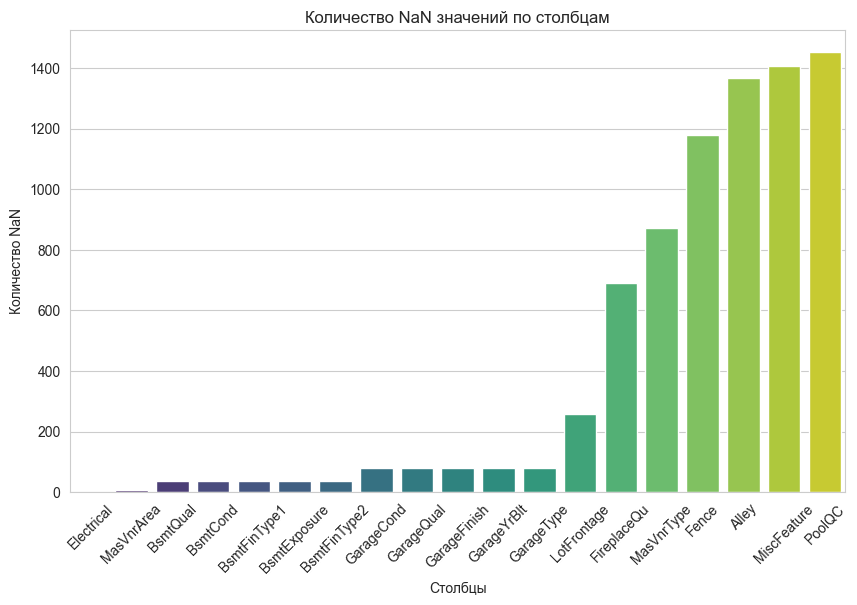

In [278]:
nan_counts = df_csv.isnull().sum()
nan_counts = nan_counts[nan_counts > 0].sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')
plt.title('Количество NaN значений по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество NaN')
plt.xticks(rotation=45) 
plt.show()

Отличный инструмент для графиков  - seaborn. Это обертка над matplotlib, которая также предоставляет более широкий набор опций

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(df_csv['SalePrice'])

**Задание**: Постройте гистограмму, но с 20 бинами.

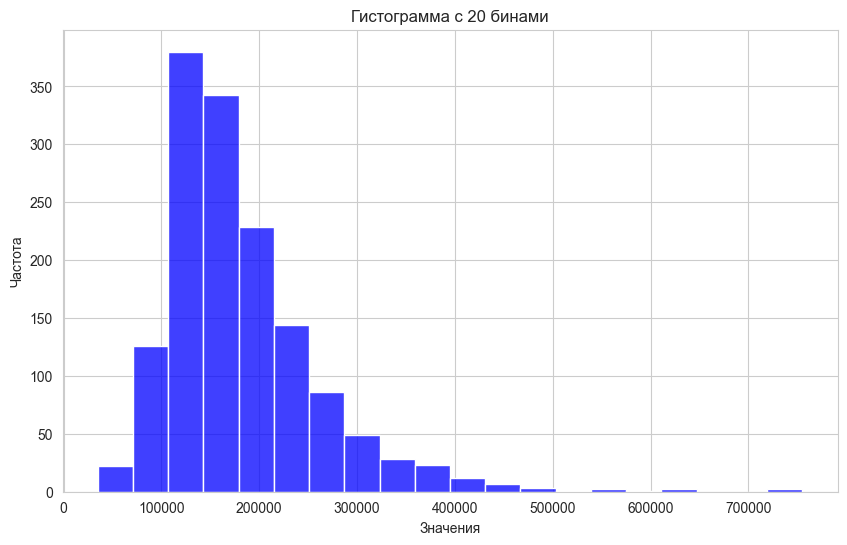

In [279]:
plt.figure(figsize=(10, 6))
sns.histplot(df_csv['SalePrice'], bins=20, kde=False, color='blue')  
plt.title('Гистограмма с 20 бинами')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

Конечно, гистограммы можно строить сразу для нескольких категорий. Посмотрим на цены и продажи в зависимости от квартала.

**Задание**: постройте гистограммы для кварталов (столбец MoSold).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


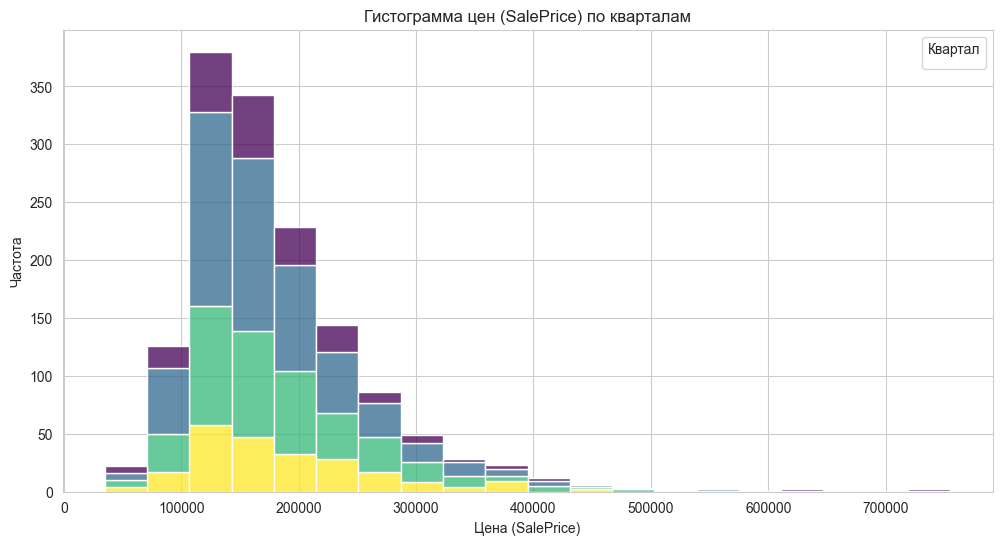

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


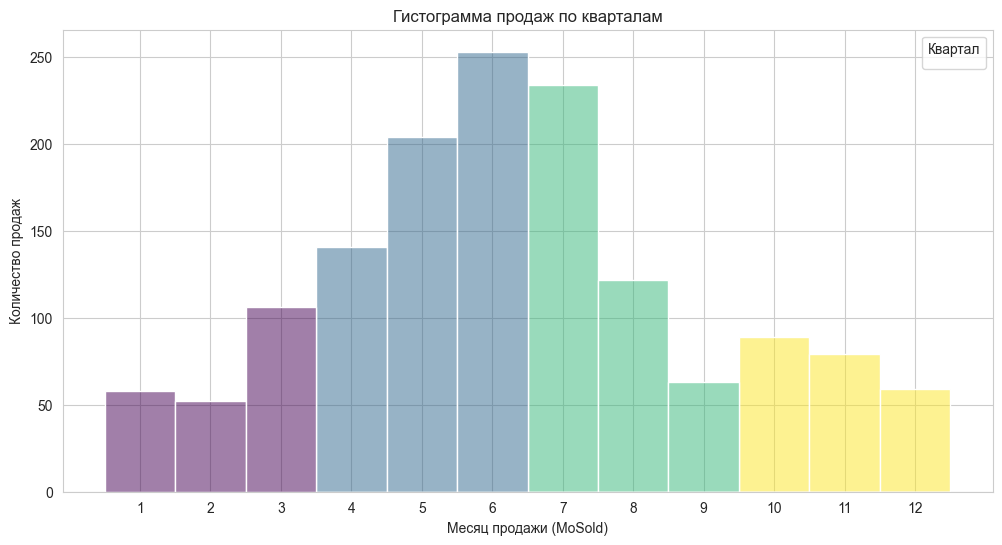

In [280]:
df_csv['QuarterSold'] = (df_csv['MoSold'] - 1) // 3 + 1

plt.figure(figsize=(12, 6))
sns.histplot(data=df_csv, x='SalePrice', hue='QuarterSold', bins=20, kde=False, palette='viridis', multiple='stack')
plt.title('Гистограмма цен (SalePrice) по кварталам')
plt.xlabel('Цена (SalePrice)')
plt.ylabel('Частота')
plt.legend(title='Квартал')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_csv, x='MoSold', hue='QuarterSold', bins=12, kde=False, palette='viridis', discrete=True)
plt.title('Гистограмма продаж по кварталам')
plt.xlabel('Месяц продажи (MoSold)')
plt.ylabel('Количество продаж')
plt.xticks(range(1, 13)) 
plt.legend(title='Квартал')
plt.show()

**Задание**: Постройте scatterplot через seaborn (scatter) для нескольких пар столбцов из датасета

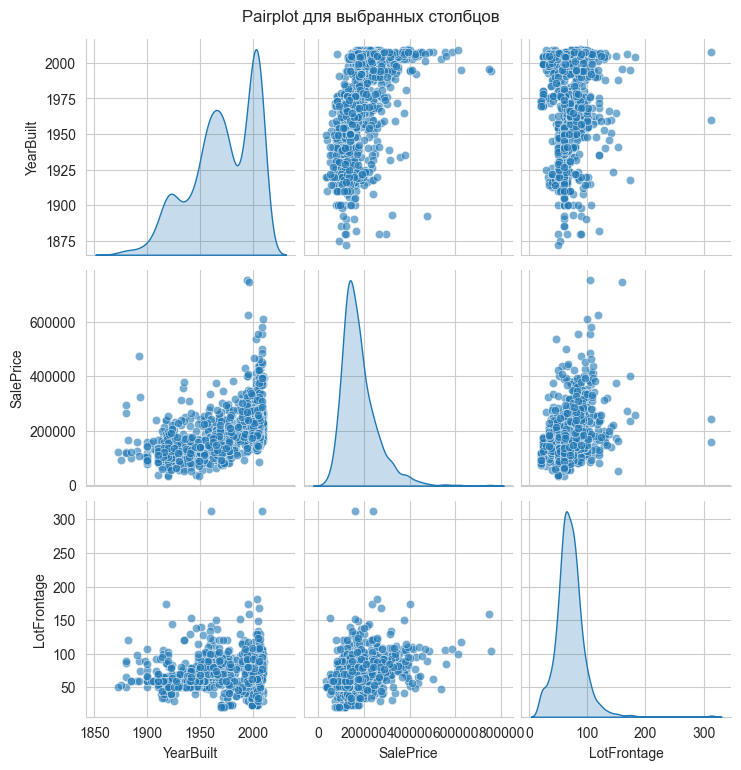

In [287]:
columns_to_plot = ['KitchenQual', 'YearBuilt', 'SalePrice', 'LotFrontage']

sns.pairplot(df_csv[columns_to_plot], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot для выбранных столбцов', y=1.02)
plt.show()

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

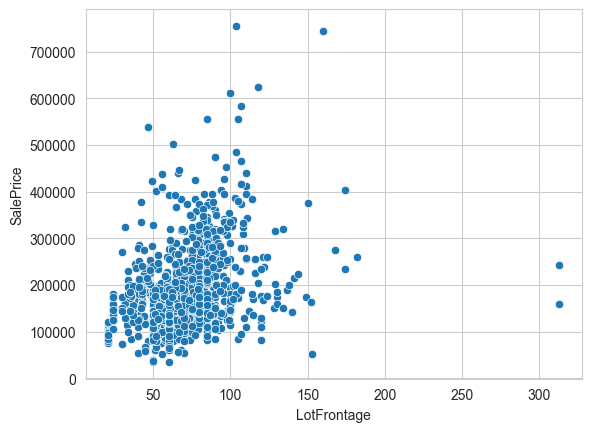

In [288]:
sns.scatterplot(x=df_csv["LotFrontage"], y=df_csv["SalePrice"])

In [289]:
df_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,QuarterSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4


Стиль графиков можно менять, например, поменяв палитру:
```
sns.set(style="whitegrid")
sns.set_palette(["#89CFF0", "#FFB6C1"])
```

Полезно строить графики и для категориальных данных. Например, будет полезно посмотреть на характеристики цены для разных LotShape

Пример такого графика: catplot. В зависимости от значения kind то, как точки будут располагаться на осях. Попробуйте не задавать его и задать "kind"
    

C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

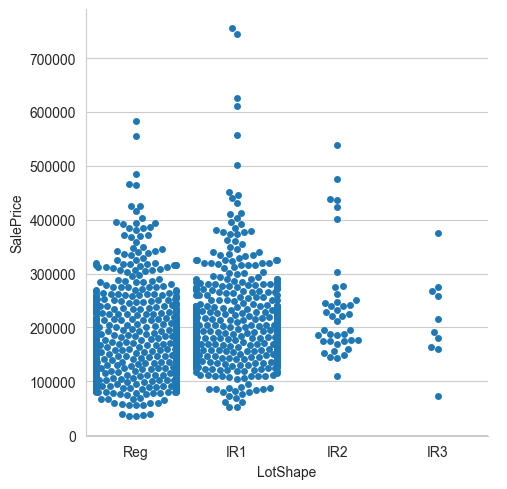

In [283]:
sns.catplot(data=df_csv, x="LotShape", y="SalePrice", kind="swarm")

**Задание**: Постройте этот график, но добавив еще одно измерение с двумя категорими. Как это сделать? Тоже через hue.

C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

Text(0.5, 1.0, 'Swarm Plot с дополнительным измерением (hue)')

C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


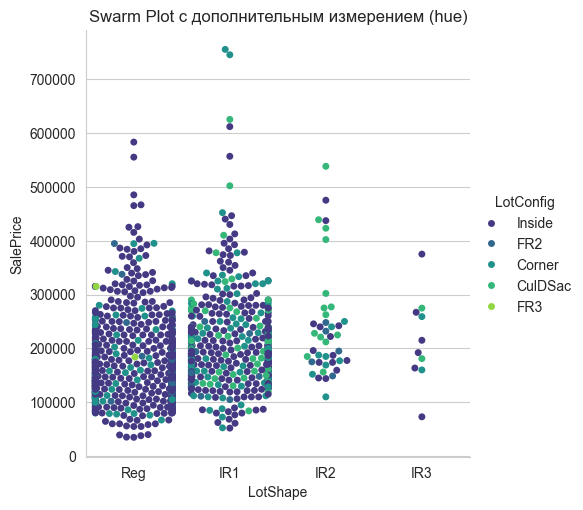

In [296]:
sns.catplot(data=df_csv, x="LotShape", y="SalePrice", hue="LotConfig", kind="swarm", palette="viridis")
plt.title('Swarm Plot с дополнительным измерением (hue)')

Есть также и более продвинутые методы. Например, можно построить графики зависимости целевой переменной от других столбцов.

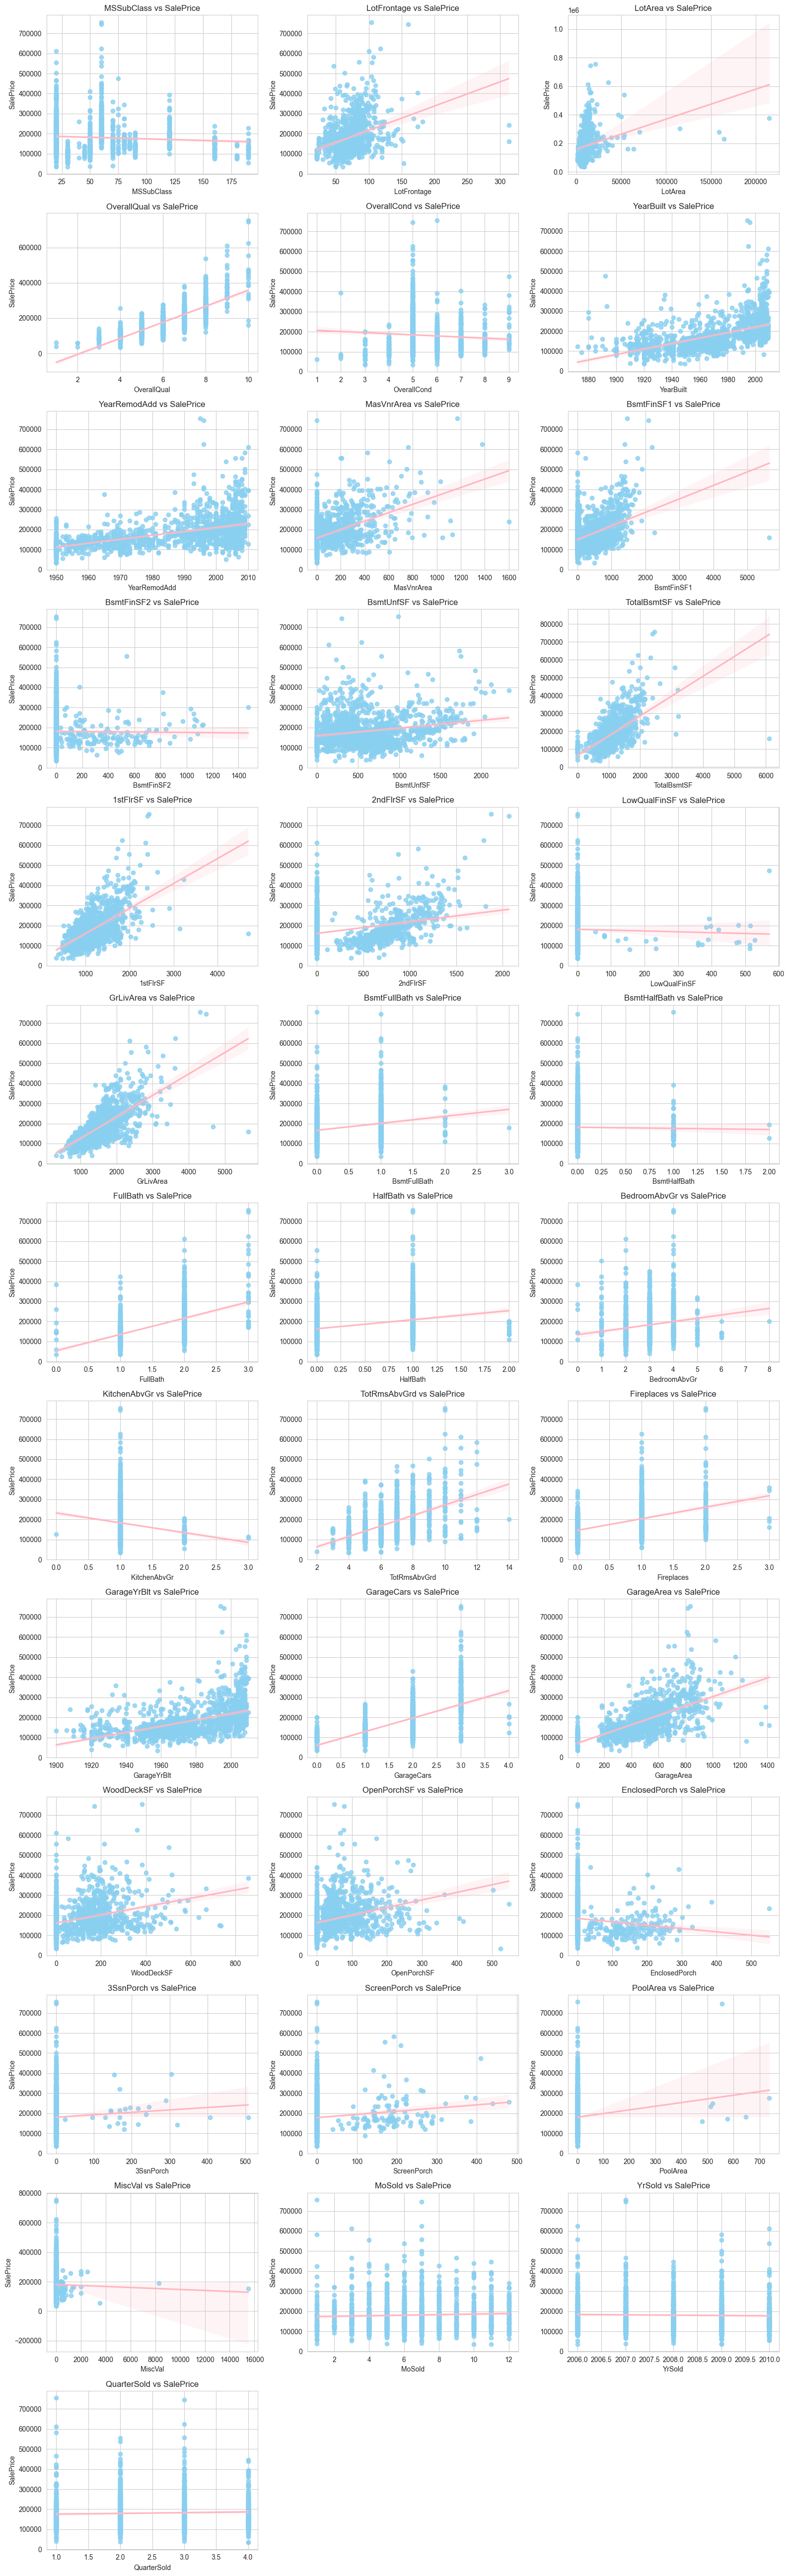

In [295]:
# Выберем все числовые столбцы из датасета, кроме индекса и цены 
numeric_col = list(df_csv.select_dtypes(include=['number']).columns)
numeric_col.remove("Id")
numeric_col.remove("SalePrice")

num_plots = len(numeric_col)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

plt.figure(figsize=(16, 4 * num_rows))

for i, col in enumerate(numeric_col):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.regplot(x=df_csv[col], y=df_csv["SalePrice"], scatter_kws={'color': '#89CFF0'}, line_kws={'color': '#FFB6C1'})
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    
plt.tight_layout()
plt.show()

Также иногда полезный, а иногда перегруженный график - pairplot. Его можно сделать даже для всего датасета.

**Задание**: сделайте pairplot для нескольких столбцов датасета. Лучше не выбирать больше 5 за раз!

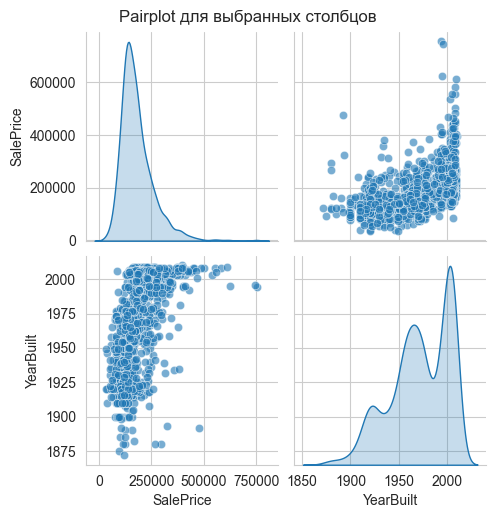

In [297]:
columns_to_plot = ["LotShape", "SalePrice", "LotConfig", 'KitchenQual', 'YearBuilt']

sns.pairplot(df_csv[columns_to_plot], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot для выбранных столбцов', y=1.02)
plt.show()